In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/unique-categories.csv
input/unique-categories.sorted-by-count.csv
input/summer-products-with-rating-and-performance_2020-08.csv


In [2]:
prod_df = pd.read_csv("input/summer-products-with-rating-and-performance_2020-08.csv")
cat_df = pd.read_csv("input/unique-categories.csv")
cat_sorted_df = pd.read_csv("input/unique-categories.sorted-by-count.csv")

In [3]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [4]:
prod_df.head()

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   
2            EUR         100               0    3.57            14   
3            EUR        5000               1    4.03           579   
4            EUR         100               1    3.10            20   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   
2                5.0  ...                    295         3.989831   
3              295.0  ...                  23832         4.020435   
4                6.0  ...                  14482         4.001588   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   
2  5d464a1ffdf7bc44ee933c65                             0   
3  58cfdefdacb37b556efdff7c                             0   
4  5ab3b592c3911a095ad5dadb                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   
2                       NaN  https://www.wish.com/c/5ea10e2c617580260d55310a   
3                       NaN  https://www.wish.com/c/5cedf17ad1d44c52c59e4aca   
4                       NaN  https://www.wish.com/c/5ebf5819ebac372b070b0e70   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   
2  https://contestimg.wish.com/api/webimage/5ea10...   
3  https://contestimg.wish.com/api/webimage/5cedf...   
4  https://contestimg.wish.com/api/webimage/5ebf5...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  
2  5ea10e2c617580260d55310a  summer     2020-08  
3  5cedf17ad1d44c52c59e4aca  summer     2020-08  
4  5ebf5819ebac372b070b0e70  summer     2020-08  

[5 rows x 43 columns]

In [5]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     2620 non-null   object
dtypes: object(1)
memory usage: 20.6+ KB


In [6]:
cat_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   count    2620 non-null   int64 
 1   keyword  2620 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.1+ KB


## price vs. retail_price

In [7]:
def plot_multiple_hist(df):
    rcParams['figure.figsize'] = 10, 5
    df.hist(bins=20)
    plt.tight_layout()
    plt.show()

target_columns = ['price', 'retail_price']
target_df = prod_df[target_columns]

plot_multiple_hist(target_df)

In [8]:
def plot_hist_together(df,label1, label2, bins):
    plt.hist([df[label1], df[label2]], bins, label=[label1, label2])
    title = label1 + ' vs. ' + label2
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show()

bins = np.linspace(0, 250, 40)
plot_hist_together(prod_df, 'price', 'retail_price', bins)

## origin_country distribution

In [9]:
def count_plot(df, label, color, figsize=(10,5), rotation=0):
    plt.figure(figsize=figsize)
    df[label].value_counts().plot(kind='bar', color=color)
    plt.xlabel(label)
    plt.ylabel('count')
    
    title = label + ' distribution'
    plt.title(title, fontsize=15)
    plt.xticks(rotation=rotation)
    plt.show()    

count_plot(prod_df, 'origin_country', '#ff6d69')

## rating distribution

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


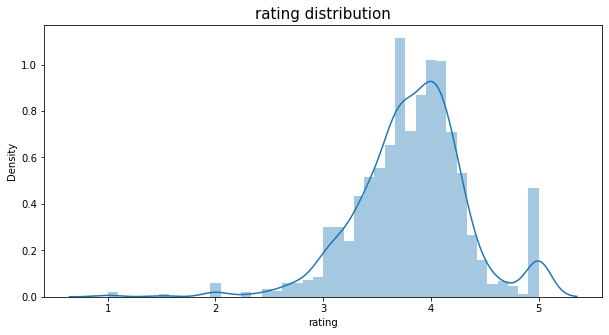

In [10]:
figsize=(10,5)
sns.distplot(prod_df['rating'])
plt.title('rating distribution', fontsize=15)
plt.show()

## Relationship between retail_price and rating

In [11]:
fig = px.scatter(prod_df, x='retail_price', y='rating')
fig.update_layout(title_text="Relationship between retail_price and rating")
fig.show()

## Relationship between uses_ad_boosts and other attributes

In [12]:
trgt_columns = ['uses_ad_boosts',
                'units_sold',
                'retail_price',
                'rating']

tmp_df = prod_df[trgt_columns]
tmp_df.groupby('uses_ad_boosts').mean()

units_sold  retail_price    rating
uses_ad_boosts                                     
0               4470.218610     24.225336  3.843139
1               4167.136564     22.061674  3.791762

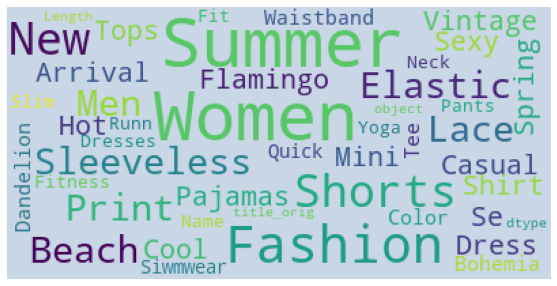

In [13]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='#c8d6e5',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(prod_df['title_orig']))

plt.subplots(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()